Carregando Wine Dataset...
Wine Dataset carregado com sucesso!

Carregando Iris Dataset...
Iris Dataset carregado com sucesso!

--- Iniciando Experimento com Wine Quality Dataset ---

Resultados Médios (30 execuções) - Wine Quality:
Random Forest: Accuracy 0.6866 ± 0.0114 | F1-score 0.6741 ± 0.0115
SVM: Accuracy 0.5725 ± 0.0097 | F1-score 0.5349 ± 0.0103
MLP Classifier: Accuracy 0.5966 ± 0.0142 | F1-score 0.5904 ± 0.0138
KNN Classifier: Accuracy 0.5600 ± 0.0124 | F1-score 0.5485 ± 0.0125
Fuzzy-like KNN: Accuracy 0.6633 ± 0.0121 | F1-score 0.6549 ± 0.0121

Gráfico 'wine_metrics_comparison.png' gerado.


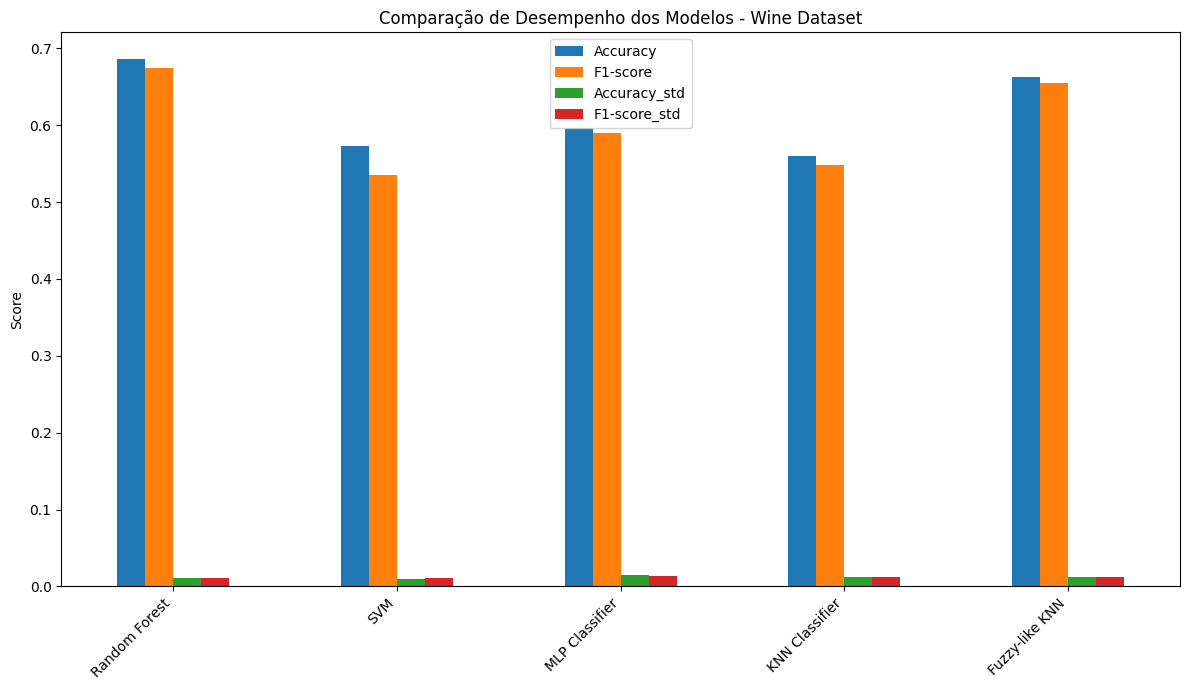

Gráfico 'wine_confusion_matrices.png' gerado.


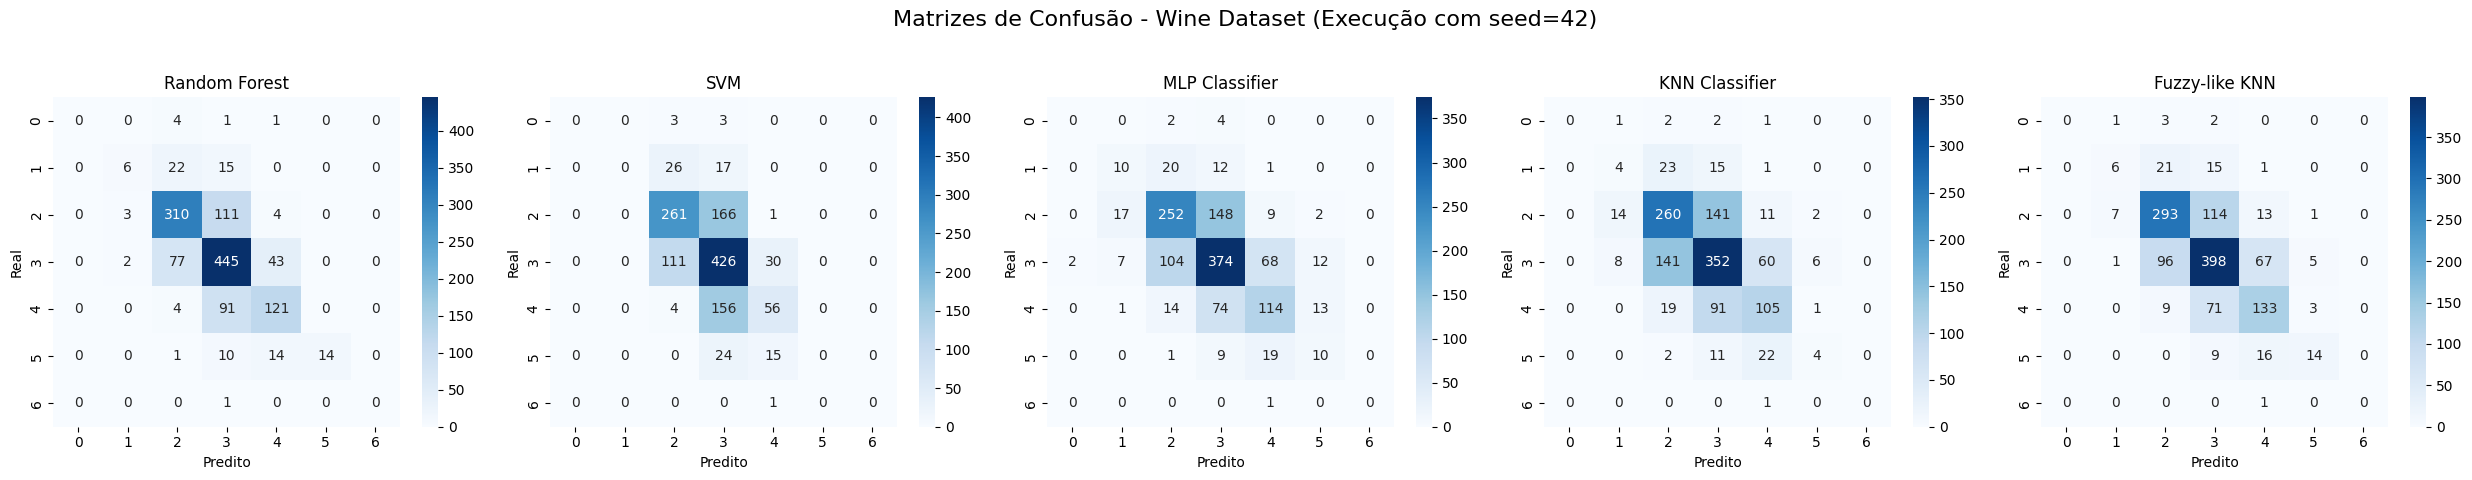


--- Relatório de Classificação Detalhado para o Melhor Modelo: Random Forest (Wine) ---
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.55      0.14      0.22        43
           5       0.74      0.72      0.73       428
           6       0.66      0.78      0.72       567
           7       0.66      0.56      0.61       216
           8       1.00      0.36      0.53        39
           9       0.00      0.00      0.00         1

    accuracy                           0.69      1300
   macro avg       0.52      0.37      0.40      1300
weighted avg       0.69      0.69      0.68      1300



--- Iniciando Experimento com Iris Dataset ---

Resultados Médios (30 execuções) - Iris Dataset:
Random Forest: Accuracy 0.9478 ± 0.0372 | F1-score 0.9474 ± 0.0375
SVM: Accuracy 0.9667 ± 0.0355 | F1-score 0.9666 ± 0.0356
MLP Classifier: Accuracy 0.9522 ± 0.0382 | F1-score 0.9520 ± 0.0383
KNN Classifier: Accurac

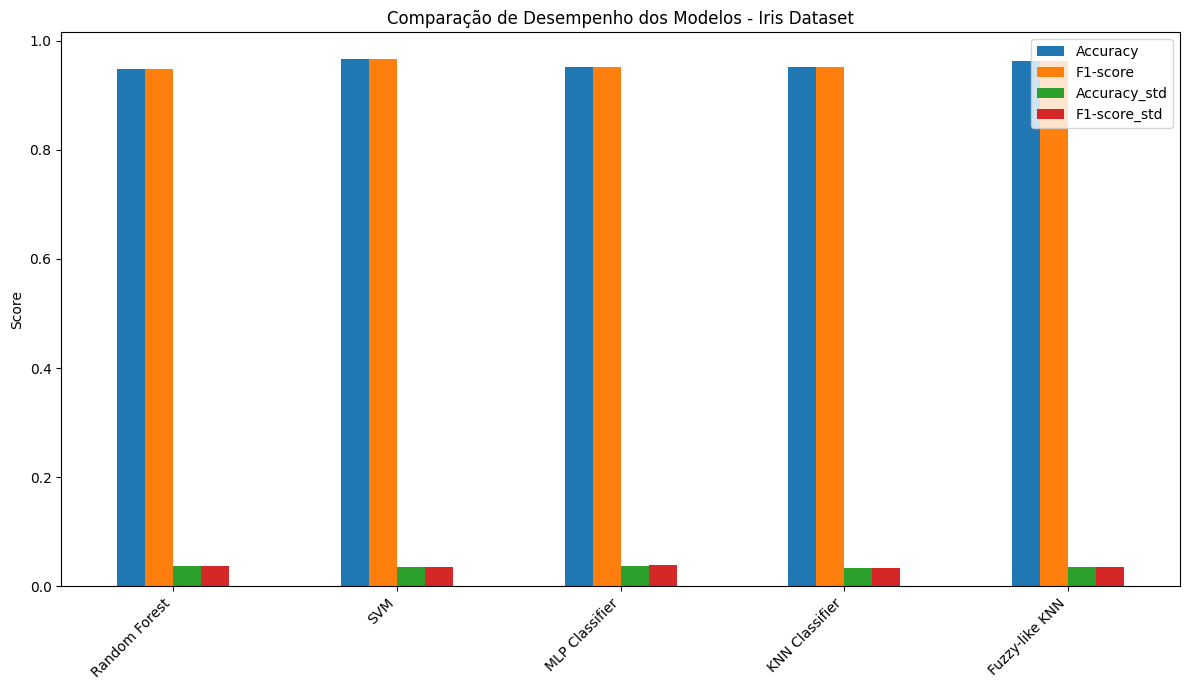

Gráfico 'iris_confusion_matrices.png' gerado.


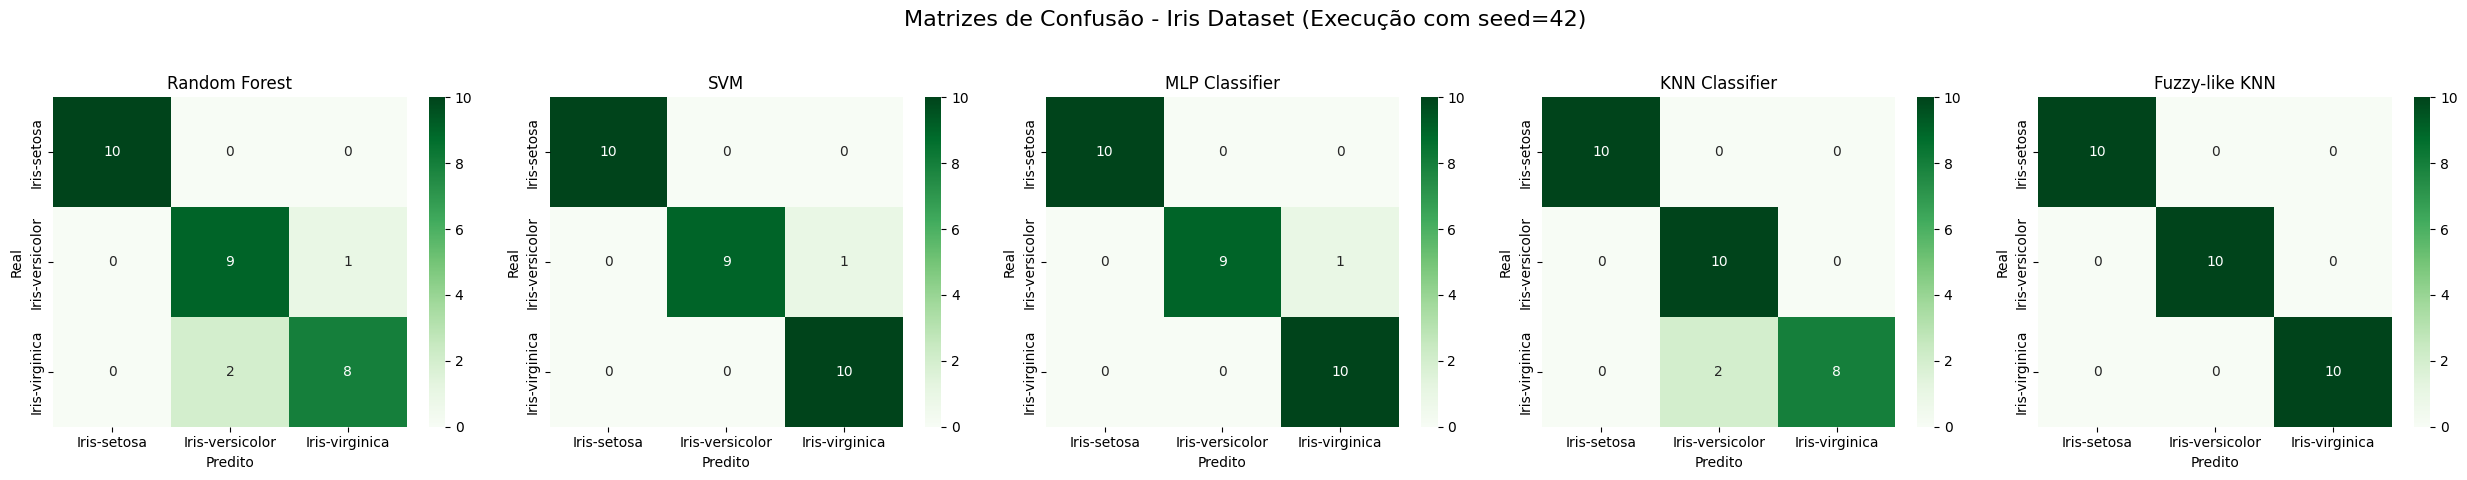


--- Relatório de Classificação Detalhado para o Melhor Modelo: SVM (Iris) ---
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [3]:
# Instalar biblioteca para carregar os datasets
!pip install ucimlrepo

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# --- Carregamento dos Datasets ---
print("Carregando Wine Dataset...")
wine_quality = fetch_ucirepo(id=186) 
X_wine = wine_quality.data.features 
y_wine = wine_quality.data.targets 
print("Wine Dataset carregado com sucesso!")

print("\nCarregando Iris Dataset...")
iris = fetch_ucirepo(id=53) 
X_iris = iris.data.features 
y_iris = iris.data.targets 
print("Iris Dataset carregado com sucesso!")

# --- Definição dos Algoritmos ---
algorithms = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42),
    'MLP Classifier': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42),
    'KNN Classifier': KNeighborsClassifier(n_neighbors=5),
    'Fuzzy-like KNN': KNeighborsClassifier(n_neighbors=7, weights='distance')
}

# --- Experimento 1: Wine Quality Dataset ---
print("\n--- Iniciando Experimento com Wine Quality Dataset ---")
scaler_wine = StandardScaler()
X_wine_scaled = scaler_wine.fit_transform(X_wine)
le_wine = LabelEncoder()
y_wine_encoded = le_wine.fit_transform(y_wine.values.ravel())

results_wine = {name: {'accuracy': [], 'f1': []} for name in algorithms}

for seed in range(1, 31):
    X_train, X_test, y_train, y_test = train_test_split(
        X_wine_scaled, y_wine_encoded, test_size=0.2, random_state=seed, stratify=y_wine_encoded
    )
    for name, model in algorithms.items():
        # Para garantir consistência nos modelos estocásticos em cada repetição
        if name in ['Random Forest', 'MLP Classifier', 'SVM']:
            model.set_params(random_state=seed)
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results_wine[name]['accuracy'].append(accuracy_score(y_test, y_pred))
        results_wine[name]['f1'].append(f1_score(y_test, y_pred, average='weighted'))

print("\nResultados Médios (30 execuções) - Wine Quality:")
mean_results_wine = {}
for name in algorithms:
    acc_mean = np.mean(results_wine[name]['accuracy'])
    acc_std = np.std(results_wine[name]['accuracy'])
    f1_mean = np.mean(results_wine[name]['f1'])
    f1_std = np.std(results_wine[name]['f1'])
    mean_results_wine[name] = {
        'Accuracy': acc_mean,
        'F1-score': f1_mean,
        'Accuracy_std': acc_std,
        'F1-score_std': f1_std
    }
    print(f"{name}: Accuracy {acc_mean:.4f} ± {acc_std:.4f} | F1-score {f1_mean:.4f} ± {f1_std:.4f}")

# Gráfico 1: Comparação de Métricas dos Modelos (Wine)
df_wine_results = pd.DataFrame(mean_results_wine).T
df_wine_results.plot(kind='bar', figsize=(12, 7))
plt.title('Comparação de Desempenho dos Modelos - Wine Dataset')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('wine_metrics_comparison.png')
print("\nGráfico 'wine_metrics_comparison.png' gerado.")
plt.show()

# Gráfico 2: Matrizes de Confusão para todos os modelos (Wine)
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
fig.suptitle('Matrizes de Confusão - Wine Dataset (Execução com seed=42)', fontsize=16)

X_train, X_test, y_train, y_test = train_test_split(
    X_wine_scaled, y_wine_encoded, test_size=0.2, random_state=42, stratify=y_wine_encoded
)

for i, (name, model) in enumerate(algorithms.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(name)
    axes[i].set_xlabel('Predito')
    axes[i].set_ylabel('Real')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('wine_confusion_matrices.png')
print("Gráfico 'wine_confusion_matrices.png' gerado.")
plt.show()

# Relatório de Classificação para o melhor modelo (Wine)
best_model_name_wine = max(mean_results_wine, key=lambda k: mean_results_wine[k]['F1-score'])
print(f"\n--- Relatório de Classificação Detalhado para o Melhor Modelo: {best_model_name_wine} (Wine) ---")
best_model_wine = algorithms[best_model_name_wine]
best_model_wine.fit(X_train, y_train)
y_pred_best_wine = best_model_wine.predict(X_test)
print(classification_report(y_test, y_pred_best_wine, target_names=[str(c) for c in le_wine.classes_]))


# --- Experimento 2: Iris Dataset ---
print("\n\n--- Iniciando Experimento com Iris Dataset ---")
scaler_iris = StandardScaler()
X_iris_scaled = scaler_iris.fit_transform(X_iris)
le_iris = LabelEncoder()
y_iris_encoded = le_iris.fit_transform(y_iris.values.ravel())

results_iris = {name: {'accuracy': [], 'f1': []} for name in algorithms}

for seed in range(1, 31):
    X_train, X_test, y_train, y_test = train_test_split(
        X_iris_scaled, y_iris_encoded, test_size=0.2, random_state=seed, stratify=y_iris_encoded
    )
    for name, model in algorithms.items():
        if name in ['Random Forest', 'MLP Classifier', 'SVM']:
            model.set_params(random_state=seed)
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results_iris[name]['accuracy'].append(accuracy_score(y_test, y_pred))
        results_iris[name]['f1'].append(f1_score(y_test, y_pred, average='weighted'))

print("\nResultados Médios (30 execuções) - Iris Dataset:")
mean_results_iris = {}
for name in algorithms:
    acc_mean = np.mean(results_iris[name]['accuracy'])
    acc_std = np.std(results_iris[name]['accuracy'])
    f1_mean = np.mean(results_iris[name]['f1'])
    f1_std = np.std(results_iris[name]['f1'])
    mean_results_iris[name] = {
        'Accuracy': acc_mean,
        'F1-score': f1_mean,
        'Accuracy_std': acc_std,
        'F1-score_std': f1_std
    }
    print(f"{name}: Accuracy {acc_mean:.4f} ± {acc_std:.4f} | F1-score {f1_mean:.4f} ± {f1_std:.4f}")

# Gráfico 3: Comparação de Métricas dos Modelos (Iris)
df_iris_results = pd.DataFrame(mean_results_iris).T
df_iris_results.plot(kind='bar', figsize=(12, 7))
plt.title('Comparação de Desempenho dos Modelos - Iris Dataset')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('iris_metrics_comparison.png')
print("\nGráfico 'iris_metrics_comparison.png' gerado.")
plt.show()

# Gráfico 4: Matrizes de Confusão para todos os modelos (Iris)
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
fig.suptitle('Matrizes de Confusão - Iris Dataset (Execução com seed=42)', fontsize=16)

X_train, X_test, y_train, y_test = train_test_split(
    X_iris_scaled, y_iris_encoded, test_size=0.2, random_state=42, stratify=y_iris_encoded
)

for i, (name, model) in enumerate(algorithms.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Greens', xticklabels=le_iris.classes_, yticklabels=le_iris.classes_)
    axes[i].set_title(name)
    axes[i].set_xlabel('Predito')
    axes[i].set_ylabel('Real')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('iris_confusion_matrices.png')
print("Gráfico 'iris_confusion_matrices.png' gerado.")
plt.show()

# Relatório de Classificação para o melhor modelo (Iris)
best_model_name_iris = max(mean_results_iris, key=lambda k: mean_results_iris[k]['F1-score'])
print(f"\n--- Relatório de Classificação Detalhado para o Melhor Modelo: {best_model_name_iris} (Iris) ---")
best_model_iris = algorithms[best_model_name_iris]
best_model_iris.fit(X_train, y_train)
y_pred_best_iris = best_model_iris.predict(X_test)
print(classification_report(y_test, y_pred_best_iris, target_names=le_iris.classes_))


Melhor modelo para Wine Quality (baseado no F1-score): Random Forest
Gráfico 'wine_best_model_confusion_matrix.png' gerado.


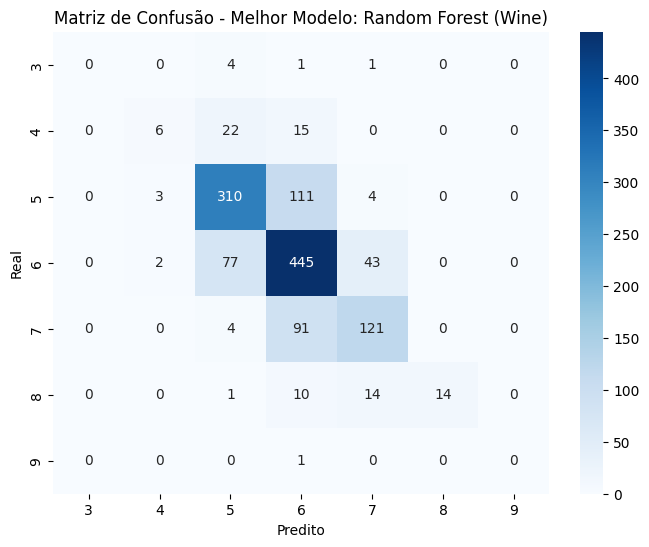


Melhor modelo para Iris (baseado no F1-score): SVM
Gráfico 'iris_best_model_confusion_matrix.png' gerado.


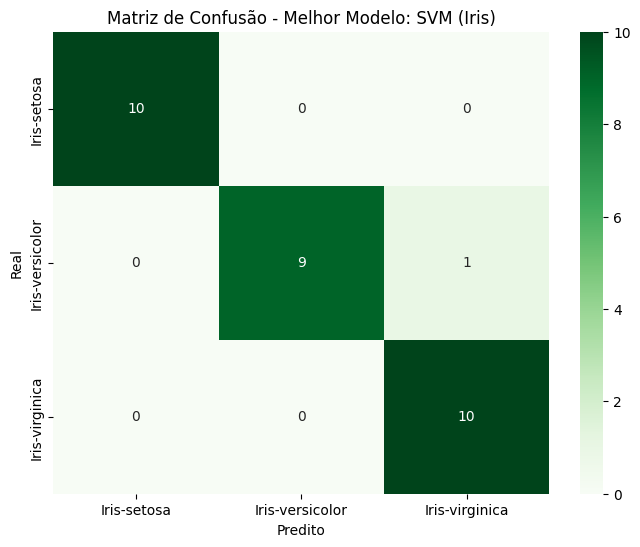

In [4]:
# Identificar o melhor modelo
best_model_name_wine = max(mean_results_wine, key=lambda k: mean_results_wine[k]['F1-score'])
print(f"\nMelhor modelo para Wine Quality (baseado no F1-score): {best_model_name_wine}")

# Gerar Matriz de Confusão para o MELHOR modelo (Wine)
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(
    X_wine_scaled, y_wine_encoded, test_size=0.2, random_state=42, stratify=y_wine_encoded
)
best_model_wine = algorithms[best_model_name_wine]
best_model_wine.fit(X_train_w, y_train_w)
y_pred_best_wine = best_model_wine.predict(X_test_w)
cm_wine = confusion_matrix(y_test_w, y_pred_best_wine)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_wine, annot=True, fmt='d', cmap='Blues', xticklabels=le_wine.classes_, yticklabels=le_wine.classes_)
plt.title(f'Matriz de Confusão - Melhor Modelo: {best_model_name_wine} (Wine)')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.savefig('wine_best_model_confusion_matrix.png')
print("Gráfico 'wine_best_model_confusion_matrix.png' gerado.")
plt.show()

# Identificar o melhor modelo
best_model_name_iris = max(mean_results_iris, key=lambda k: mean_results_iris[k]['F1-score'])
print(f"\nMelhor modelo para Iris (baseado no F1-score): {best_model_name_iris}")

# Gerar Matriz de Confusão para o MELHOR modelo (Iris)
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(
    X_iris_scaled, y_iris_encoded, test_size=0.2, random_state=42, stratify=y_iris_encoded
)
best_model_iris = algorithms[best_model_name_iris]
best_model_iris.fit(X_train_i, y_train_i)
y_pred_best_iris = best_model_iris.predict(X_test_i)
cm_iris = confusion_matrix(y_test_i, y_pred_best_iris)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_iris, annot=True, fmt='d', cmap='Greens', xticklabels=le_iris.classes_, yticklabels=le_iris.classes_)
plt.title(f'Matriz de Confusão - Melhor Modelo: {best_model_name_iris} (Iris)')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.savefig('iris_best_model_confusion_matrix.png')
print("Gráfico 'iris_best_model_confusion_matrix.png' gerado.")
plt.show()

Gráfico 'wine_best_model_confusion_matrix_percent.png' gerado.


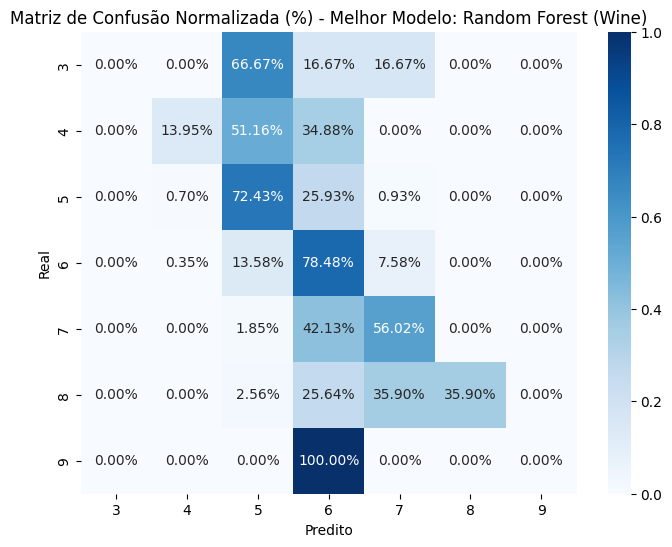

In [5]:
# Gerar Matriz de Confusão em PORCENTAGEM para o MELHOR modelo (Wine)
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(
    X_wine_scaled, y_wine_encoded, test_size=0.2, random_state=42, stratify=y_wine_encoded
)
best_model_wine = algorithms[best_model_name_wine]
best_model_wine.fit(X_train_w, y_train_w)
y_pred_best_wine = best_model_wine.predict(X_test_w)

# AQUI ESTÁ A MUDANÇA: normalize='true'
cm_wine = confusion_matrix(y_test_w, y_pred_best_wine, normalize='true')

plt.figure(figsize=(8, 6))
# E AQUI: fmt='.2%' para formatar como porcentagem
sns.heatmap(cm_wine, annot=True, fmt='.2%', cmap='Blues', xticklabels=le_wine.classes_, yticklabels=le_wine.classes_)
plt.title(f'Matriz de Confusão Normalizada (%) - Melhor Modelo: {best_model_name_wine} (Wine)')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.savefig('wine_best_model_confusion_matrix_percent.png')
print("Gráfico 'wine_best_model_confusion_matrix_percent.png' gerado.")
plt.show()

Gráfico 'iris_best_model_confusion_matrix_percent.png' gerado.


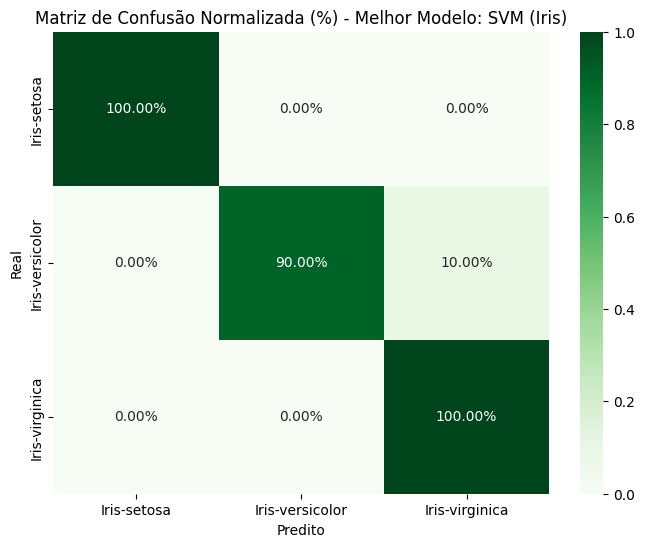

In [6]:
# Gerar Matriz de Confusão em PORCENTAGEM para o MELHOR modelo (Iris)
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(
    X_iris_scaled, y_iris_encoded, test_size=0.2, random_state=42, stratify=y_iris_encoded
)
best_model_iris = algorithms[best_model_name_iris]
best_model_iris.fit(X_train_i, y_train_i)
y_pred_best_iris = best_model_iris.predict(X_test_i)

# AQUI ESTÁ A MUDANÇA: normalize='true'
cm_iris = confusion_matrix(y_test_i, y_pred_best_iris, normalize='true')

plt.figure(figsize=(8, 6))
# E AQUI: fmt='.2%' para formatar como porcentagem
sns.heatmap(cm_iris, annot=True, fmt='.2%', cmap='Greens', xticklabels=le_iris.classes_, yticklabels=le_iris.classes_)
plt.title(f'Matriz de Confusão Normalizada (%) - Melhor Modelo: {best_model_name_iris} (Iris)')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.savefig('iris_best_model_confusion_matrix_percent.png')
print("Gráfico 'iris_best_model_confusion_matrix_percent.png' gerado.")
plt.show()

Gráfico 'iris_confusion_matrices_percent.png' gerado.


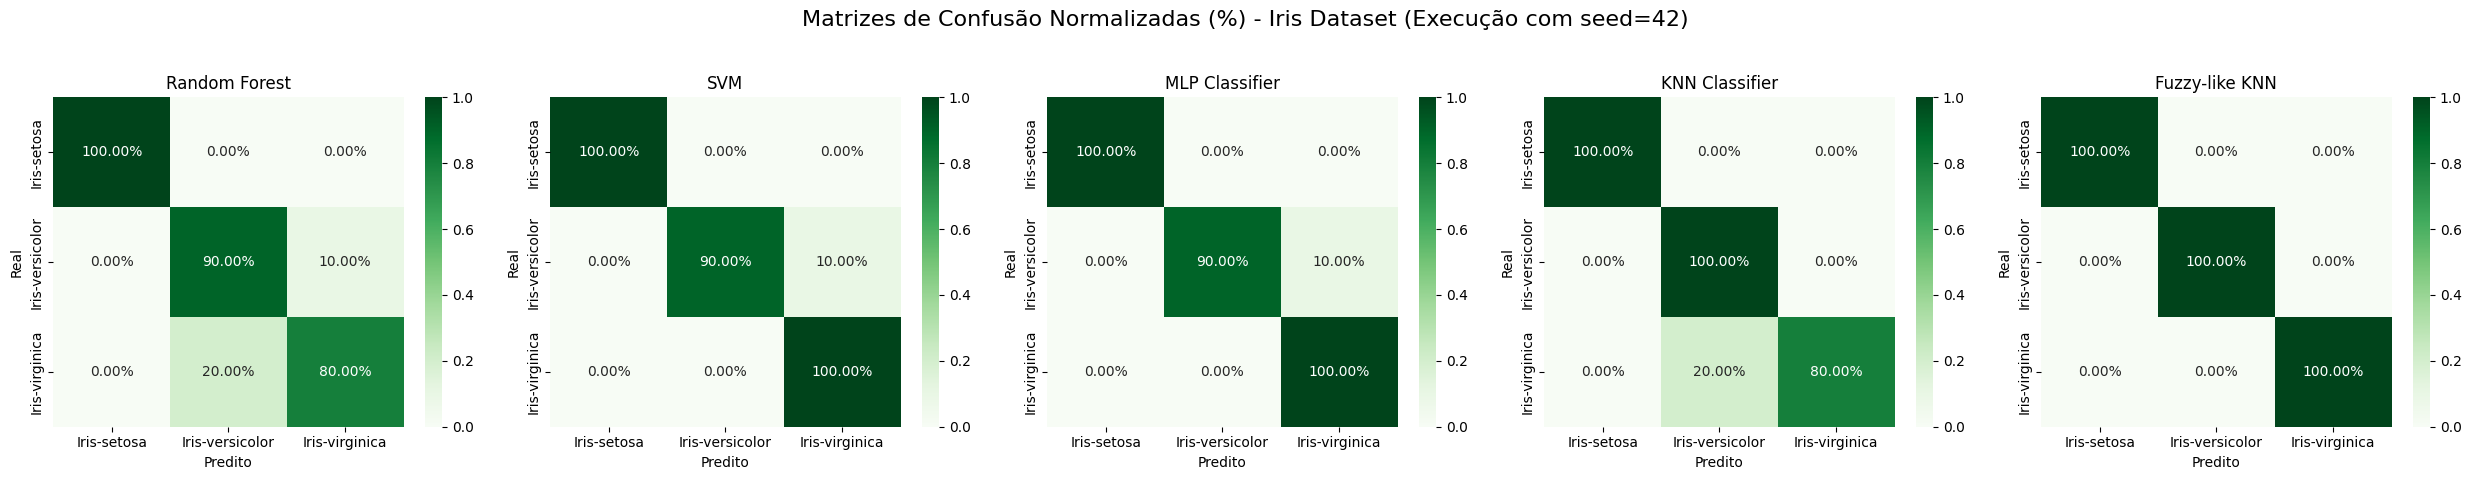

In [7]:
# Gráfico 4: Matrizes de Confusão para todos os modelos (Iris)
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
fig.suptitle('Matrizes de Confusão Normalizadas (%) - Iris Dataset (Execução com seed=42)', fontsize=16)

X_train, X_test, y_train, y_test = train_test_split(
    X_iris_scaled, y_iris_encoded, test_size=0.2, random_state=42, stratify=y_iris_encoded
)

for i, (name, model) in enumerate(algorithms.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # MUDANÇA 1: Normalizar a matriz para que as linhas somem 100%
    cm = confusion_matrix(y_test, y_pred, normalize='true') 
    
    # MUDANÇA 2: Formatar a anotação para exibir como porcentagem
    sns.heatmap(cm, annot=True, fmt='.2%', ax=axes[i], cmap='Greens', xticklabels=le_iris.classes_, yticklabels=le_iris.classes_)
    
    axes[i].set_title(name)
    axes[i].set_xlabel('Predito')
    axes[i].set_ylabel('Real')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('iris_confusion_matrices_percent.png')
print("Gráfico 'iris_confusion_matrices_percent.png' gerado.")
plt.show()

Gráfico 'wine_confusion_matrices_percent.png' gerado.


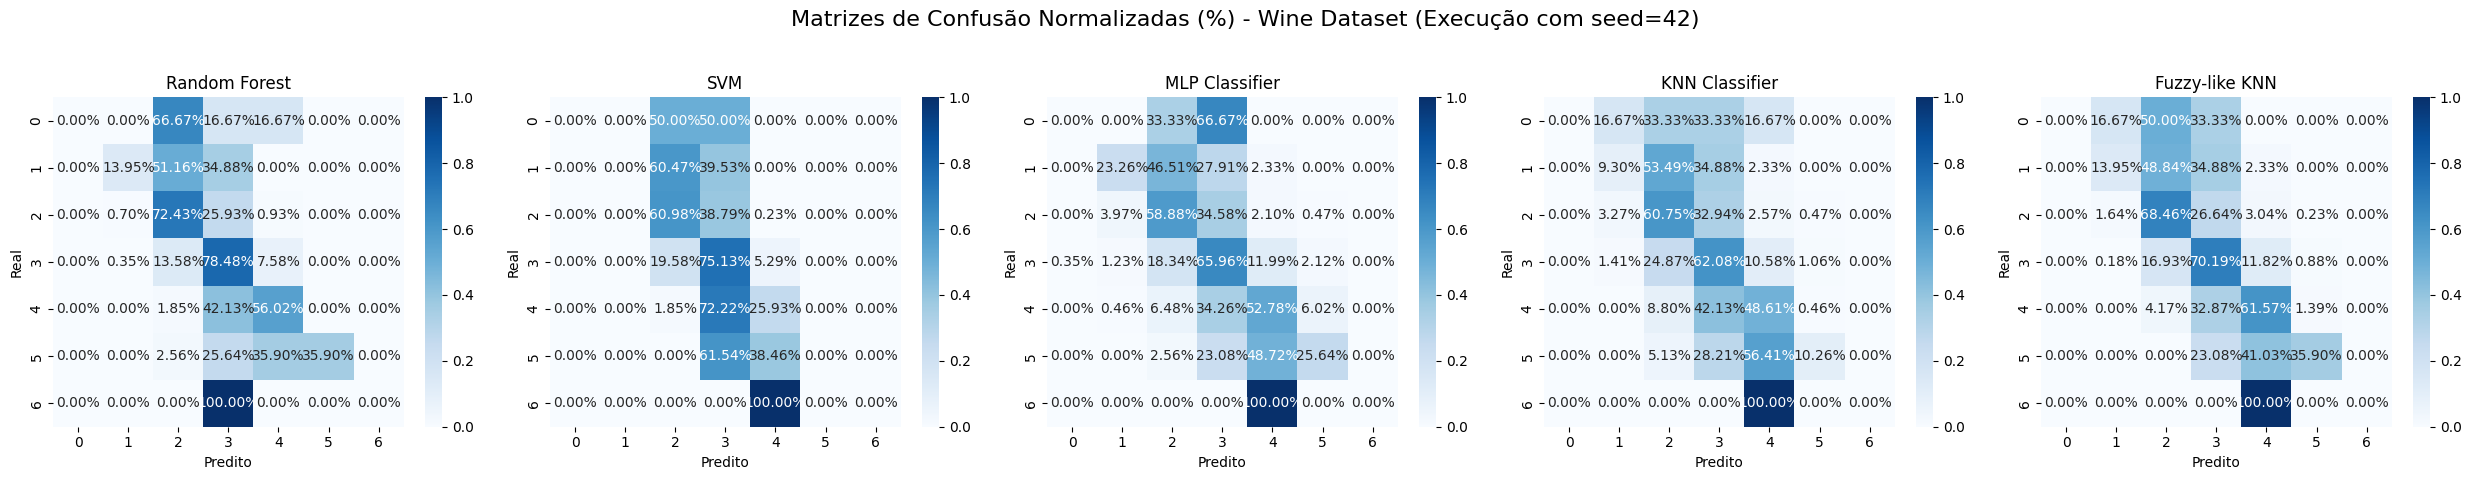

In [8]:
# Gráfico 2: Matrizes de Confusão para todos os modelos (Wine)
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
fig.suptitle('Matrizes de Confusão Normalizadas (%) - Wine Dataset (Execução com seed=42)', fontsize=16)

X_train, X_test, y_train, y_test = train_test_split(
    X_wine_scaled, y_wine_encoded, test_size=0.2, random_state=42, stratify=y_wine_encoded
)

for i, (name, model) in enumerate(algorithms.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # MUDANÇA 1: Normalizar a matriz
    cm = confusion_matrix(y_test, y_pred, normalize='true')
    
    # MUDANÇA 2: Formatar para porcentagem
    sns.heatmap(cm, annot=True, fmt='.2%', ax=axes[i], cmap='Blues')
    
    axes[i].set_title(name)
    axes[i].set_xlabel('Predito')
    axes[i].set_ylabel('Real')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('wine_confusion_matrices_percent.png')
print("Gráfico 'wine_confusion_matrices_percent.png' gerado.")
plt.show()